In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.
/Users/hoangvo/opt/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/hoangvo/opt/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/hoangvo/opt/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint1

In [3]:
n_pts = 500 #number of points
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]] 
X, y = datasets.make_blobs(n_samples=n_pts, 
                           random_state=123, 
                           centers=centers,
                           cluster_std = 0.4) 
#cluster_std: cluster standard deviation: the distance between points, or distribution between points

In [4]:
print(X)
print(y)

[[ 0.95219249  1.39076863]
 [ 1.65952714  1.68618744]
 [-0.473863    0.05839169]
 [-1.41959667  0.96995176]
 [ 1.05997353 -0.78014296]
 [-1.60724319 -1.18447497]
 [-0.82564969 -1.1275828 ]
 [-0.11680167 -0.0467727 ]
 [ 0.72626083 -0.10110012]
 [ 0.42796744 -0.36373081]
 [ 1.08583443  0.83913611]
 [ 1.38965297 -0.93588251]
 [-1.58604649 -0.85462178]
 [-0.44909701  0.94272961]
 [ 1.40572155 -1.68359671]
 [-0.71461074 -0.0609578 ]
 [ 0.63020037  0.13222531]
 [ 0.74338976  0.0234151 ]
 [ 1.02112227  0.35169921]
 [-1.40786203  1.06717692]
 [ 0.73537974  0.62811535]
 [-0.53991778  0.49305918]
 [ 1.16554523  1.01893675]
 [-0.19294613  0.43191854]
 [-1.16056577 -0.73060349]
 [ 0.67184979  0.7509346 ]
 [-0.25482897 -0.6659765 ]
 [-0.8742912   0.46949382]
 [ 0.57943063  0.35688003]
 [ 1.16644953 -1.05312047]
 [ 0.82413112  1.43528819]
 [-1.15029996 -1.55188999]
 [-1.50155227  0.7448994 ]
 [ 0.27281391  0.11862263]
 [-1.03947388 -1.08599322]
 [-0.59490438  1.11149634]
 [-0.48077467 -0.18831422]
 

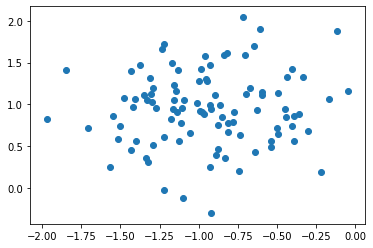

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1])

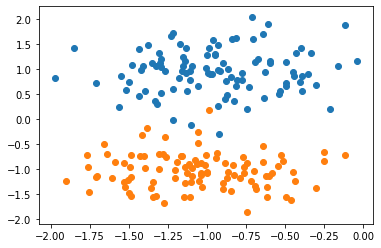

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

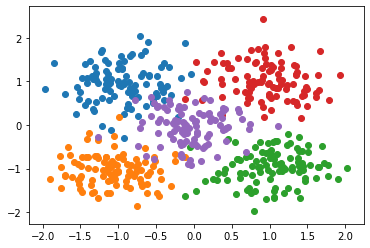

In [7]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
print(y)
y_cat = to_categorical(y, 5) 
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [10]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2, ), activation= 'softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
 model.fit(x=X, y=y_cat, verbose =1, batch_size = 50, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
500/500 [==============================] - 0s 175us/step - loss: 1.4465 - accuracy: 0.4320
Epoch 2/100
500/500 [==============================] - 0s 19us/step - loss: 0.6835 - accuracy: 0.8100
Epoch 3/100
500/500 [==============================] - 0s 21us/step - loss: 0.4569 - accuracy: 0.8760
Epoch 4/100
500/500 [==============================] - 0s 18us/step - loss: 0.3534 - accuracy: 0.9400
Epoch 5/100
500/500 [==============================] - 0s 18us/step - loss: 0.3093 - accuracy: 0.9520
Epoch 6/100
500/500 [==============================] - 0s 21us/step - loss: 0.2801 - accuracy: 0.9480
Epoch 7/100
500/500 [==============================] - 0s 19us/step - loss: 0.2601 - accuracy: 0.9440
Epoch 8/100
500/500 [==============================] - 0s 18us/step - loss: 0.2463 - accuracy: 0.9500
Epoch 9/100
500/500 [==============================] - 0s 19us/step - loss: 0.2353 - accuracy: 0.9480
Epoch 10/100
500/500 [===========

500/500 [==============================] - 0s 19us/step - loss: 0.1529 - accuracy: 0.9500
Epoch 78/100
500/500 [==============================] - 0s 18us/step - loss: 0.1527 - accuracy: 0.9500
Epoch 79/100
500/500 [==============================] - 0s 18us/step - loss: 0.1527 - accuracy: 0.9500
Epoch 80/100
500/500 [==============================] - 0s 23us/step - loss: 0.1544 - accuracy: 0.9520
Epoch 81/100
500/500 [==============================] - 0s 18us/step - loss: 0.1524 - accuracy: 0.9500
Epoch 82/100
500/500 [==============================] - 0s 18us/step - loss: 0.1519 - accuracy: 0.9520
Epoch 83/100
500/500 [==============================] - 0s 18us/step - loss: 0.1517 - accuracy: 0.9520
Epoch 84/100
500/500 [==============================] - 0s 19us/step - loss: 0.1538 - accuracy: 0.9460
Epoch 85/100
500/500 [==============================] - 0s 18us/step - loss: 0.1519 - accuracy: 0.9480
Epoch 86/100
500/500 [==============================] - 0s 18us/step - loss: 0.1512 - 

In [12]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid)# use predict_classes instead of predict because this is multi_class
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

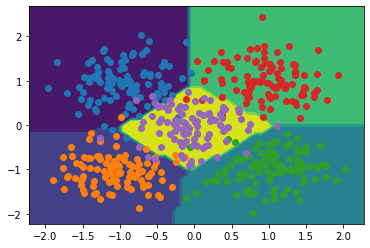

In [13]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

prediction is :  [4]


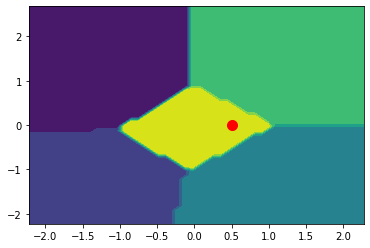

In [18]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
#--------------------
x = 0.5
y = 0
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize= 10, color="red")
print("prediction is : ", prediction)